In [1]:
import geopandas as gpd
import rasterio
from rasterio.windows import Window
import matplotlib.pyplot as plt
import numpy as np

In [4]:
points.shape

(14586, 16)

In [3]:

shapefile_path = "/home/sambal/Desktop/Plaksha-CDA/stubble_burning/data/modis/DL_FIRE_M-C61_360733/fire_archive_M-C61_360733.shp"
points = gpd.read_file(shapefile_path)
points[points['CONFIDENCE']>75]

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,TYPE,geometry
4,31.4562,72.4756,335.2,1.1,1.1,2022-09-15,0840,Aqua,MODIS,82,6.03,303.3,28.7,D,0,POINT (72.47560 31.45620)
37,30.5929,72.1559,340.4,1.2,1.1,2022-09-22,0844,Aqua,MODIS,87,6.03,303.6,45.0,D,0,POINT (72.15590 30.59290)
43,29.4590,76.8666,329.4,1.0,1.0,2022-09-26,0527,Terra,MODIS,83,6.03,297.1,22.8,D,0,POINT (76.86660 29.45900)
44,29.4569,76.8638,333.0,1.0,1.0,2022-09-26,0818,Aqua,MODIS,85,6.03,299.0,26.6,D,0,POINT (76.86380 29.45690)
69,31.0553,74.2831,328.3,1.2,1.1,2022-10-01,0836,Aqua,MODIS,78,6.03,304.6,19.8,D,0,POINT (74.28310 31.05530)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14541,29.9153,74.9474,318.6,1.0,1.0,2022-11-28,2058,Aqua,MODIS,97,6.03,284.0,20.1,N,0,POINT (74.94740 29.91530)
14542,29.9138,74.9577,324.5,1.0,1.0,2022-11-28,2058,Aqua,MODIS,100,6.03,287.7,26.2,N,0,POINT (74.95770 29.91380)
14545,30.9658,73.8755,320.3,1.1,1.1,2022-11-29,0547,Terra,MODIS,77,6.03,293.5,19.8,D,2,POINT (73.87550 30.96580)
14553,27.8747,79.0360,323.5,1.2,1.1,2022-11-29,0756,Aqua,MODIS,79,6.03,299.8,22.2,D,0,POINT (79.03600 27.87470)


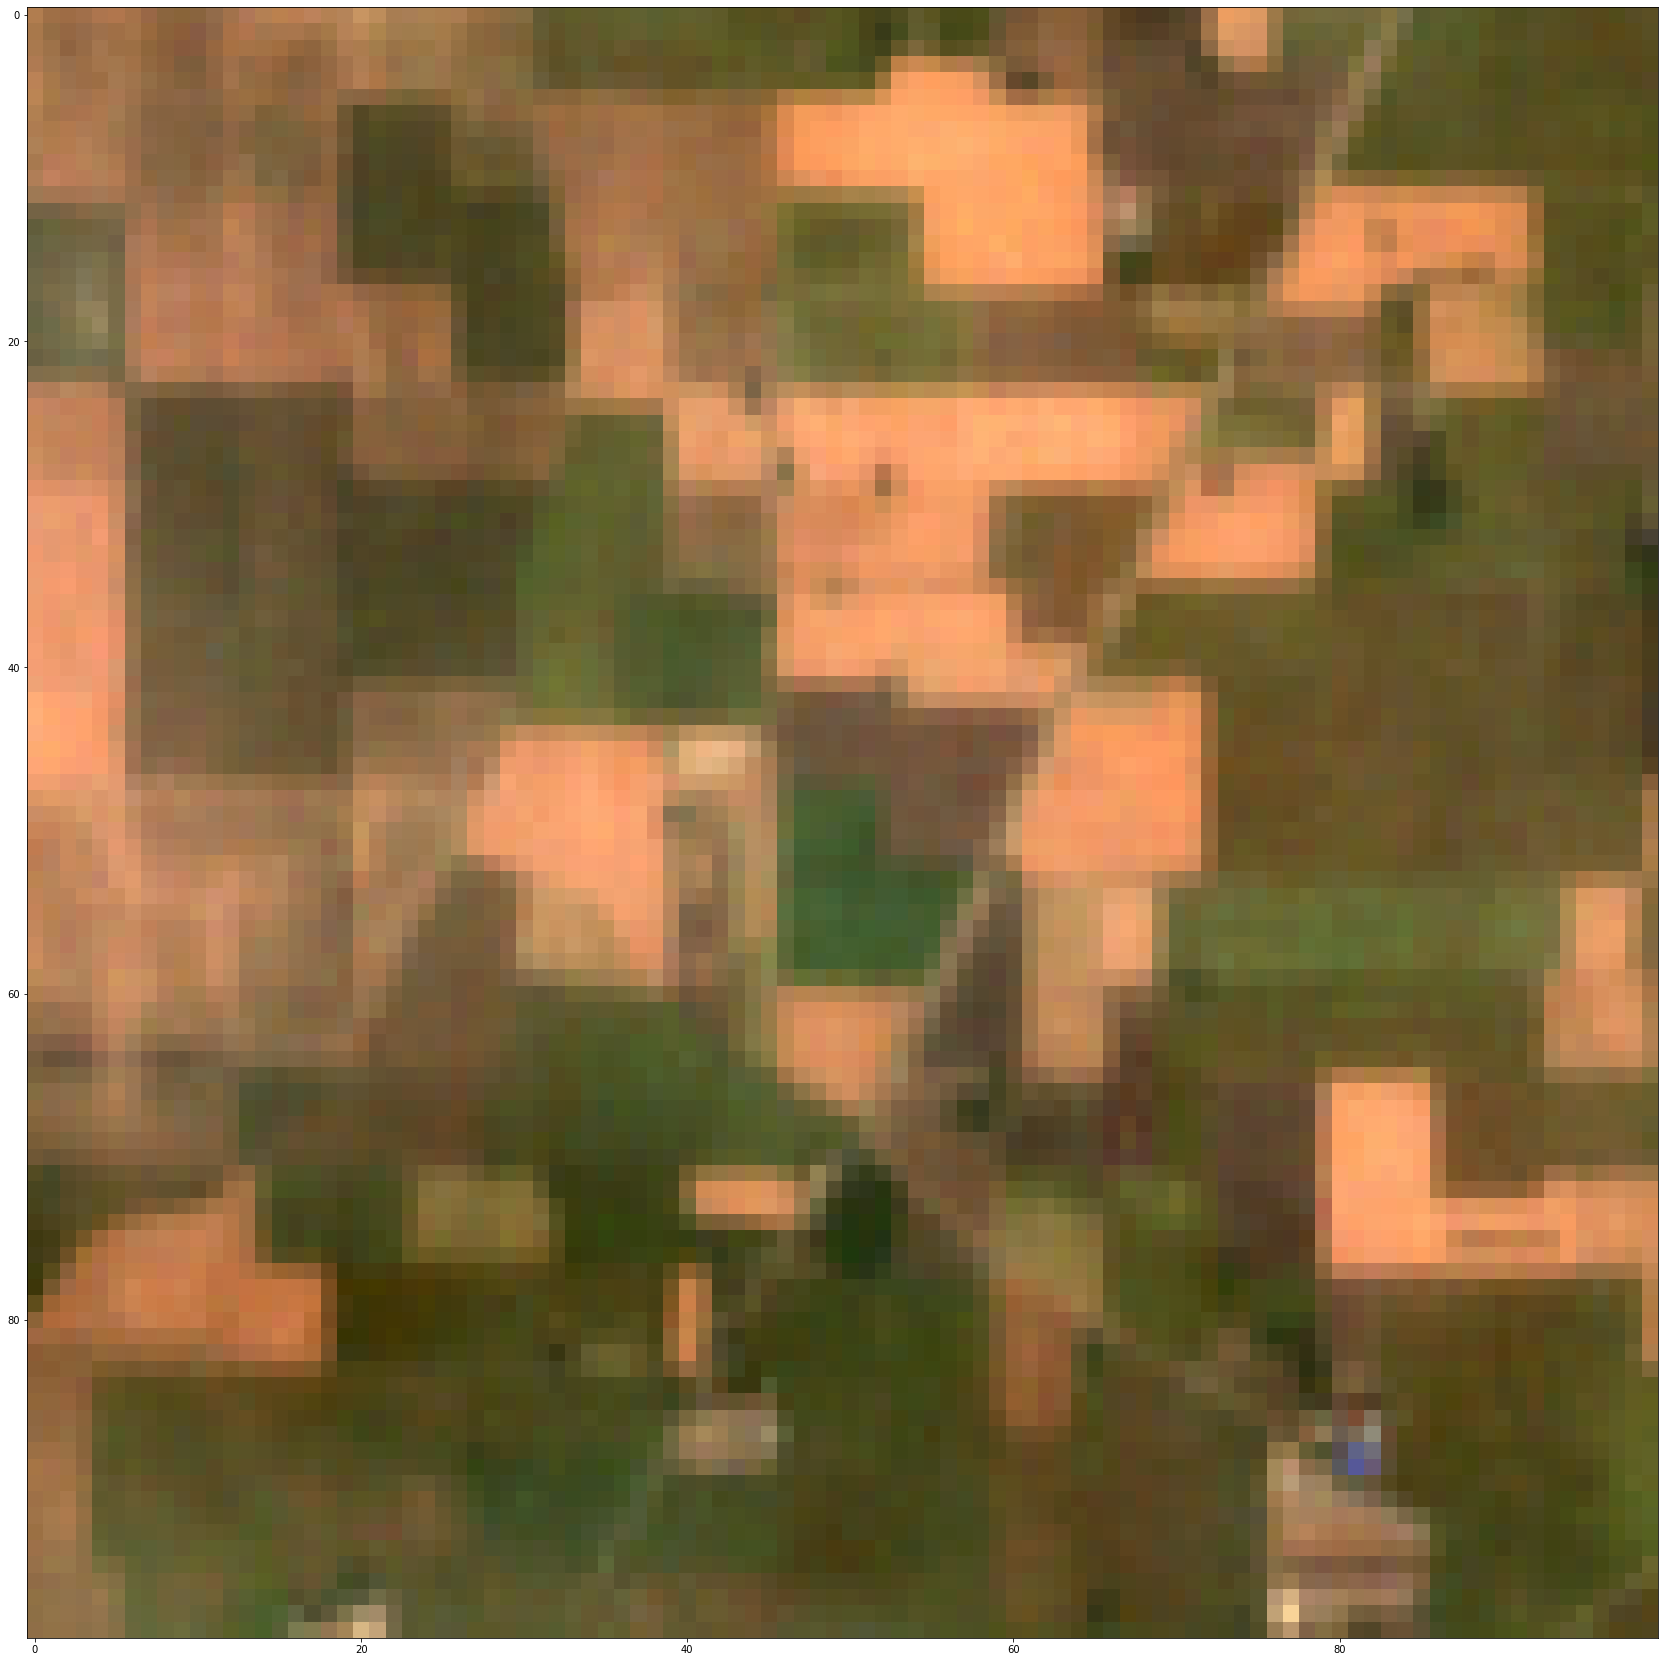

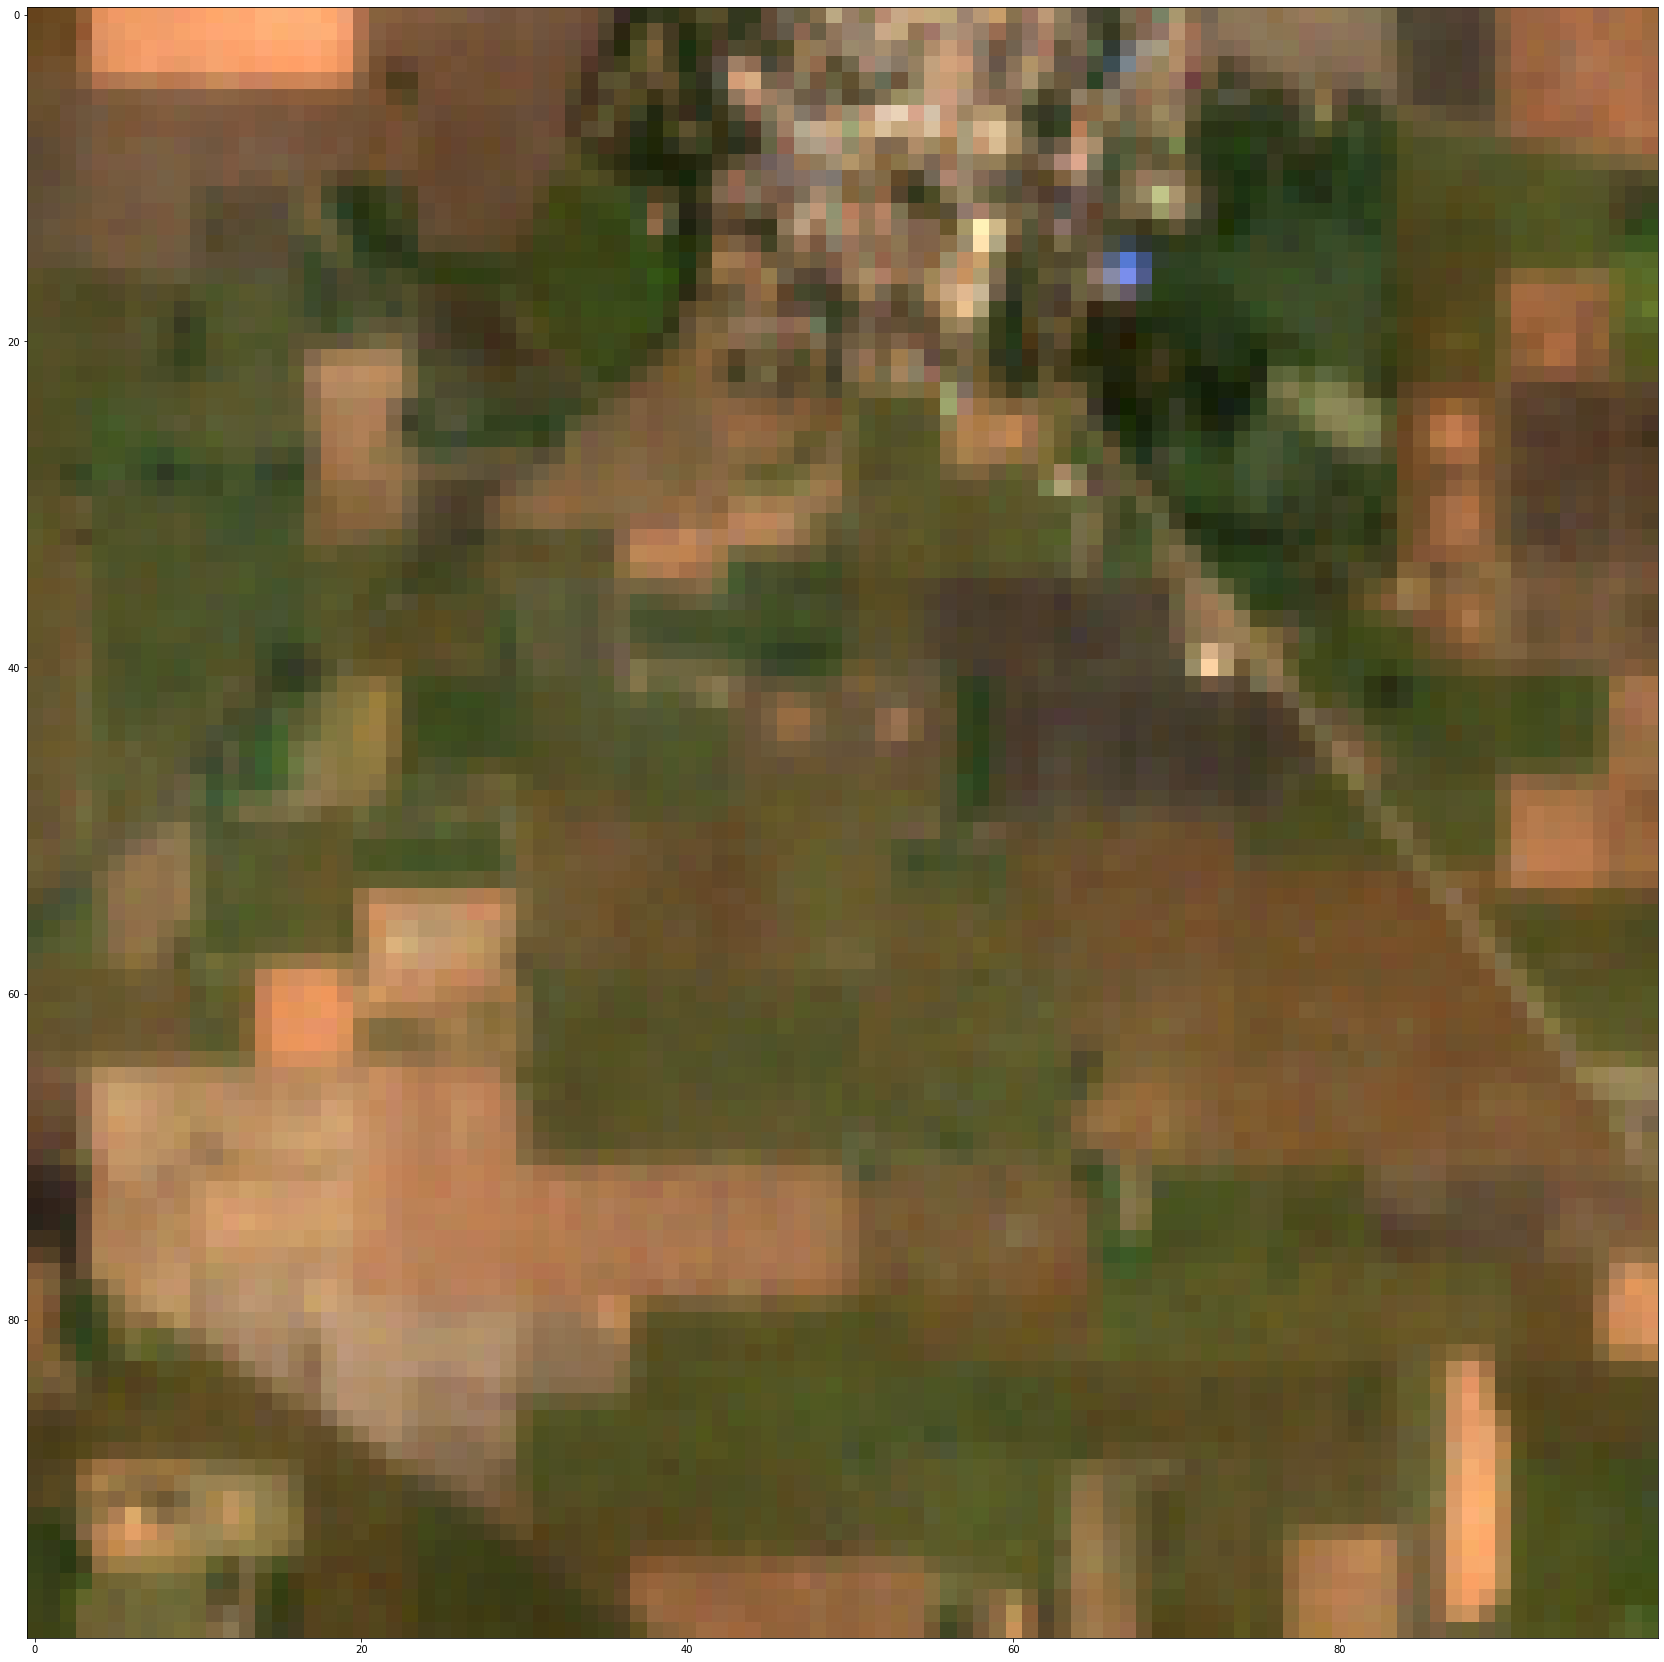

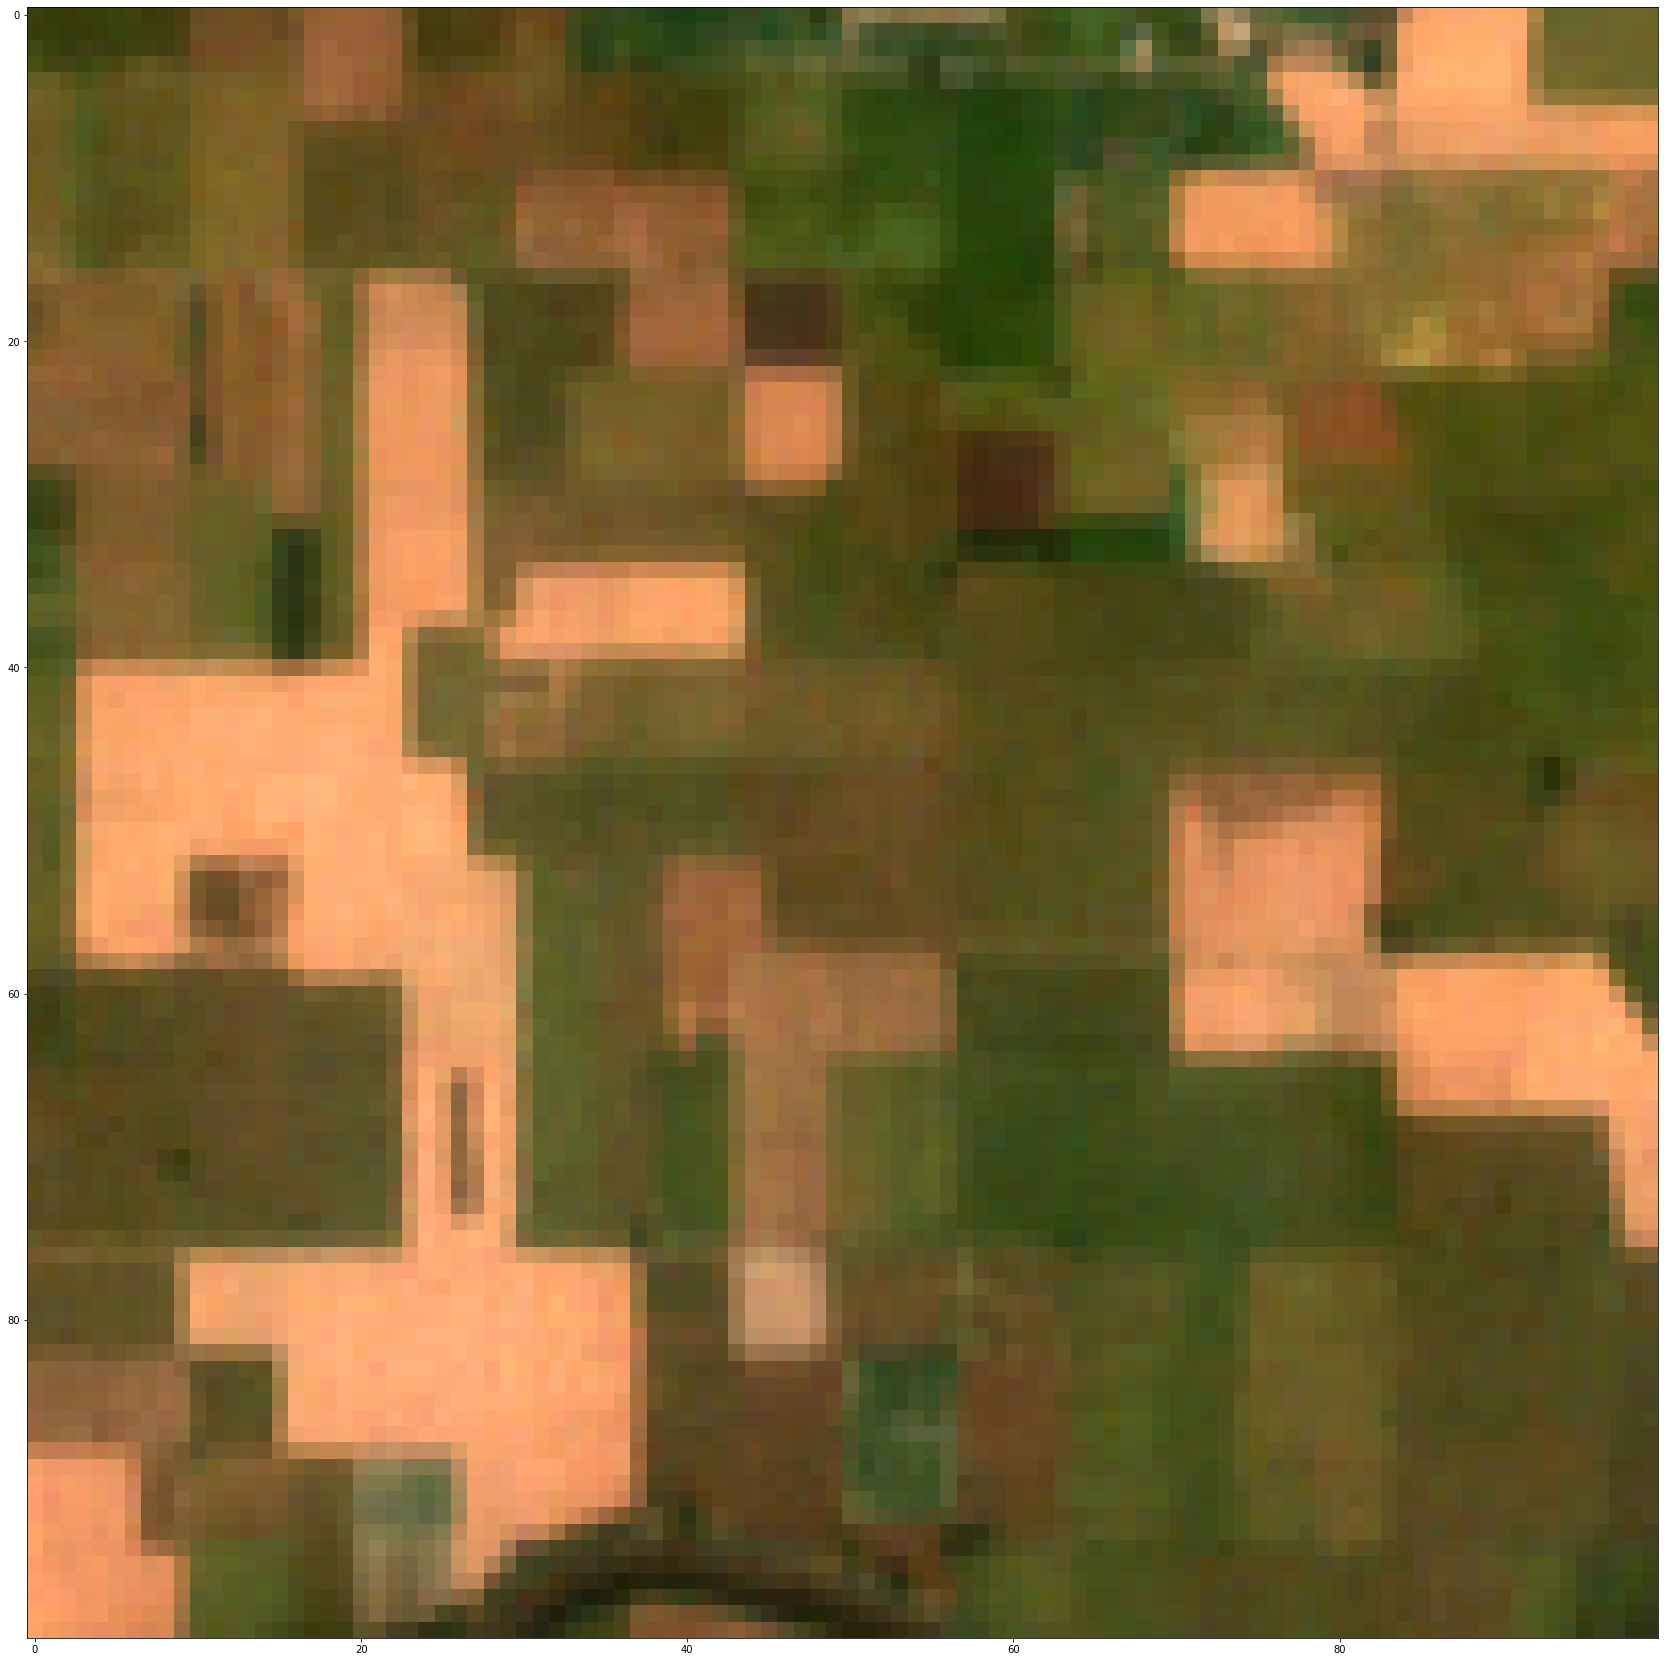

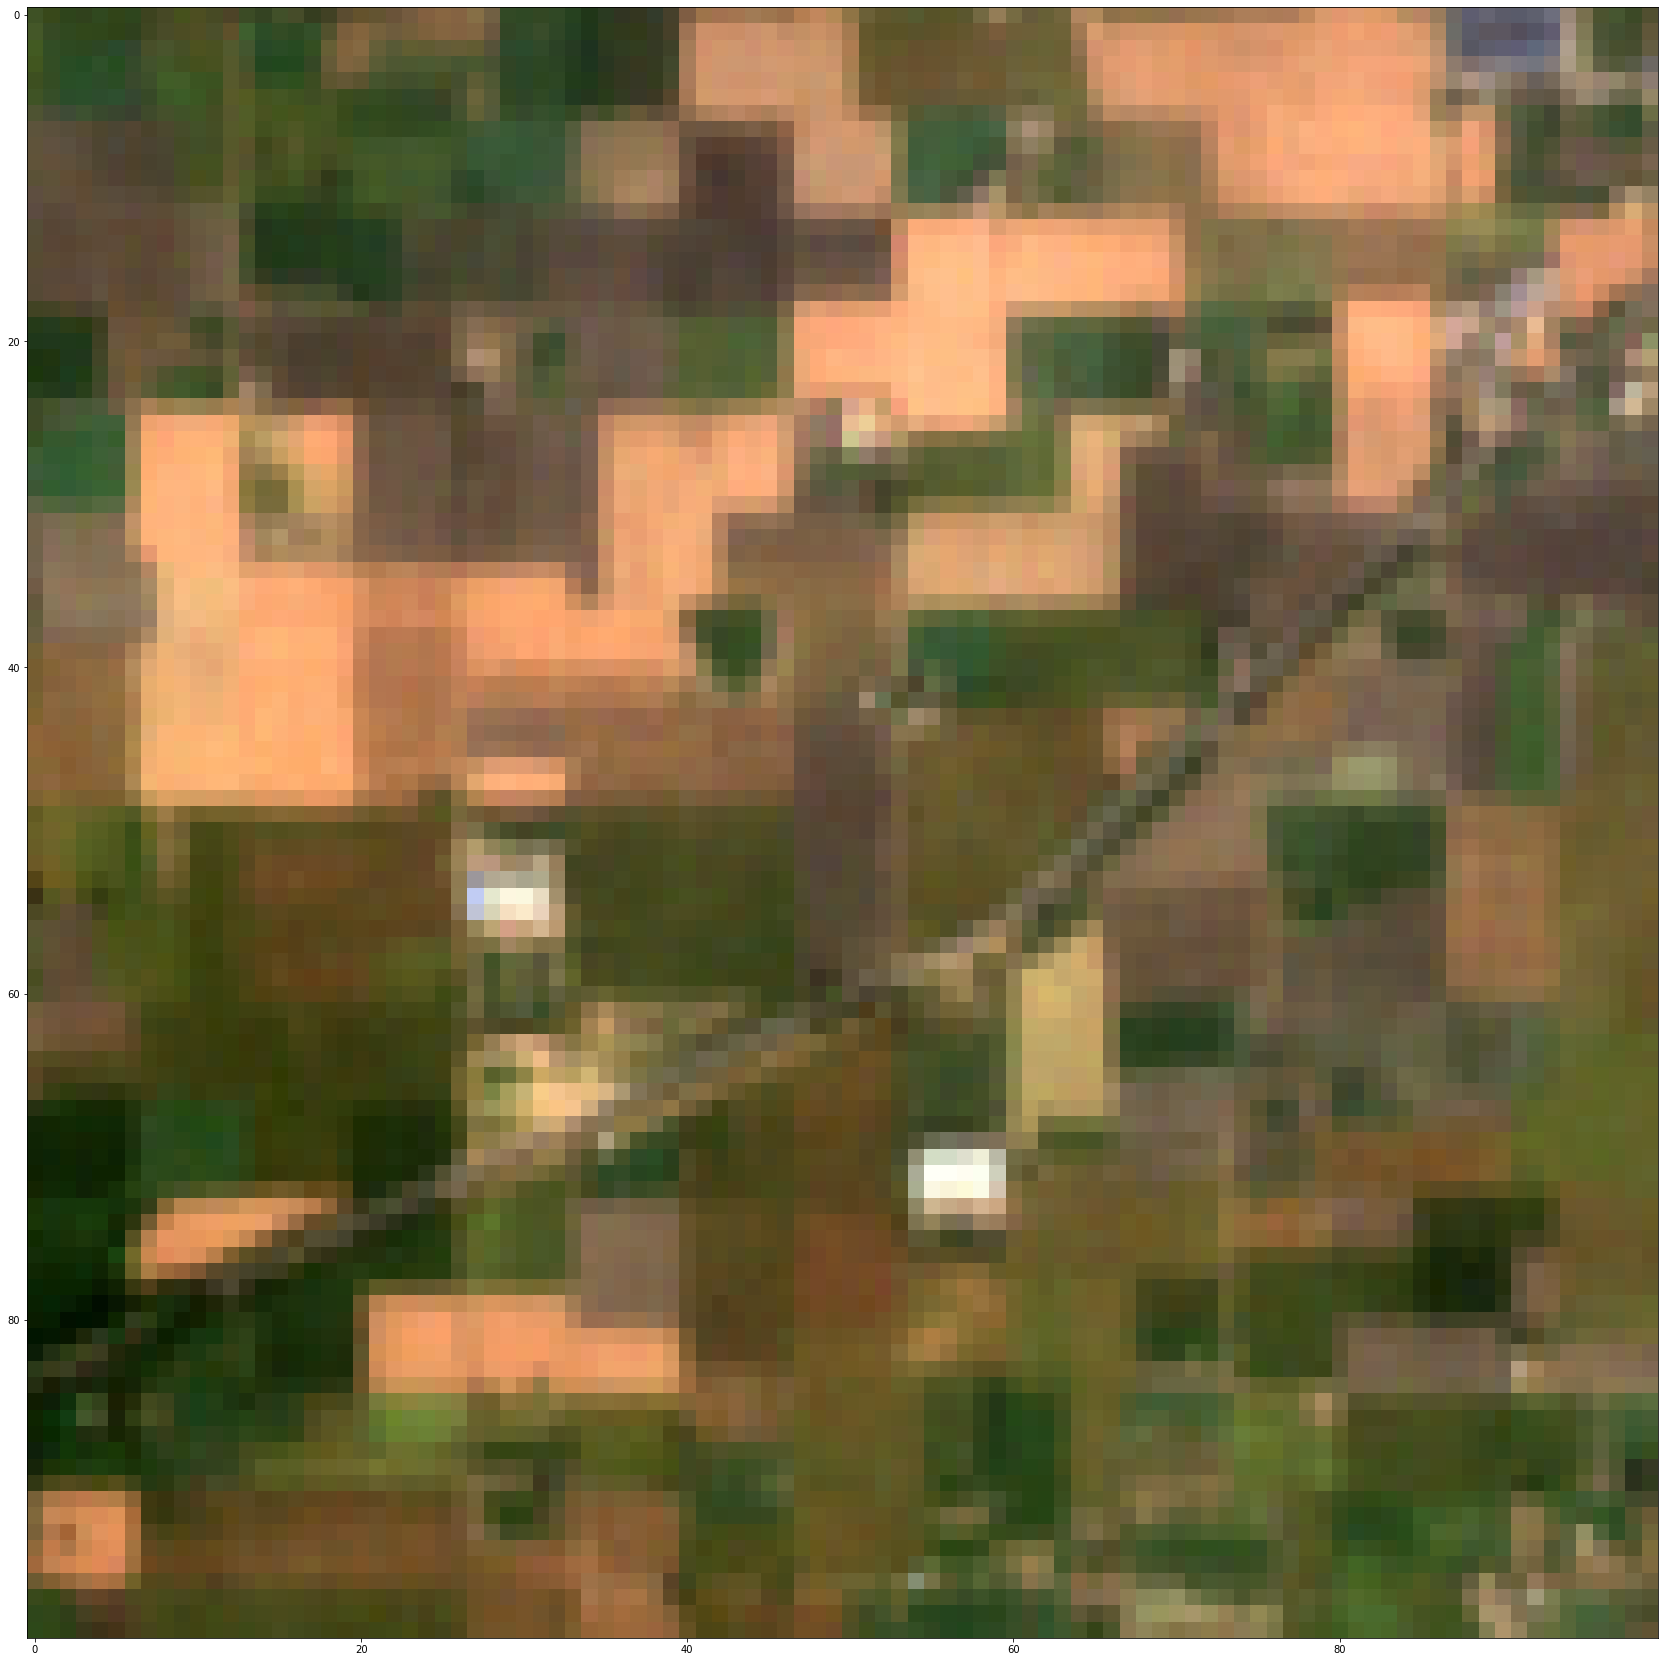

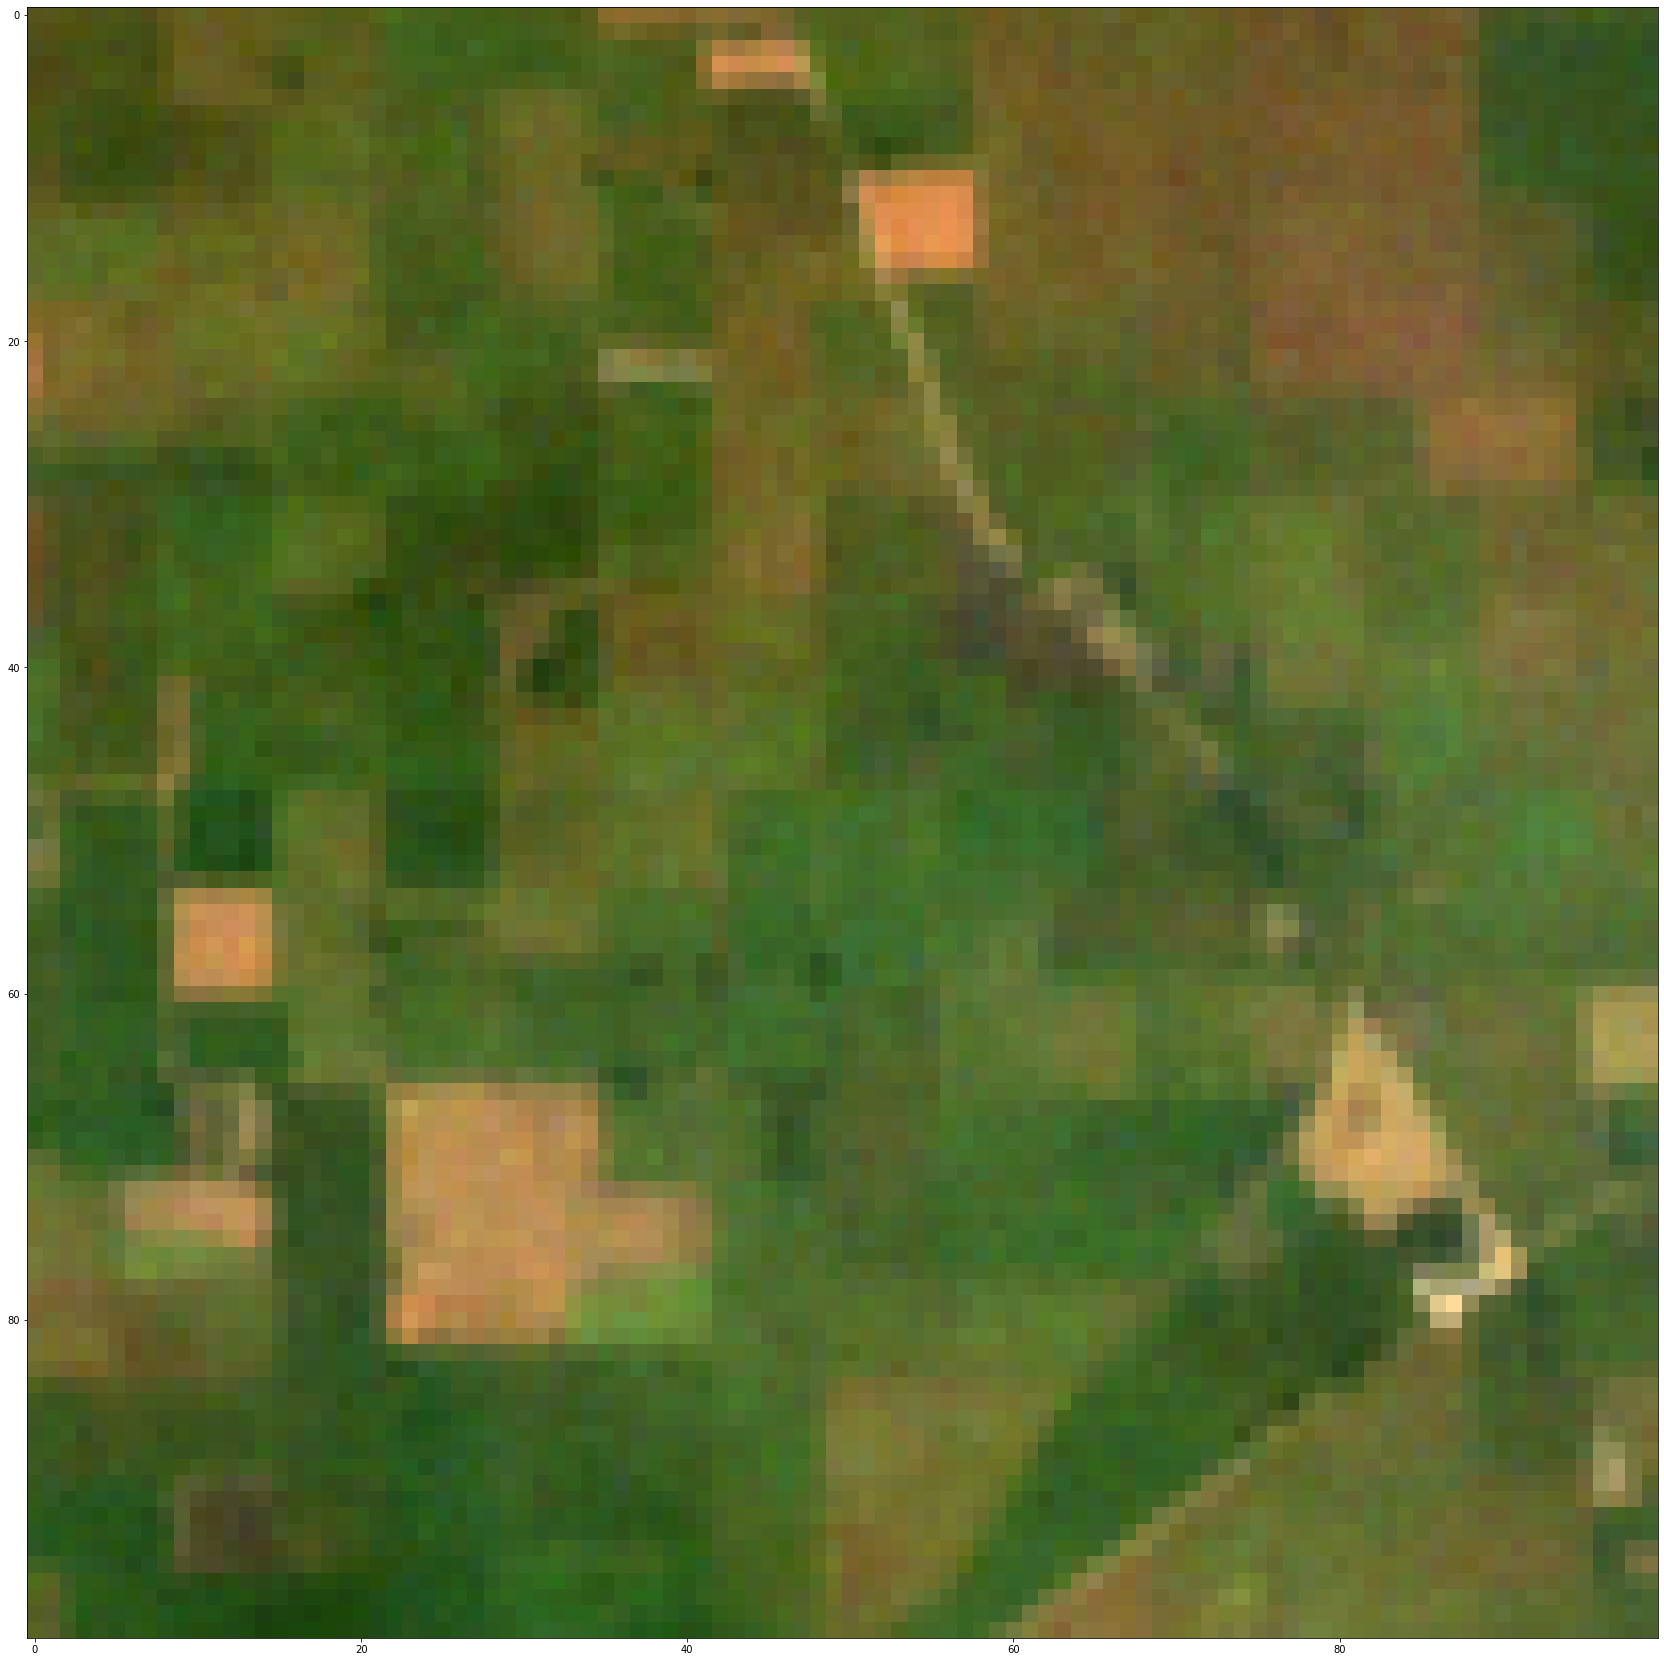

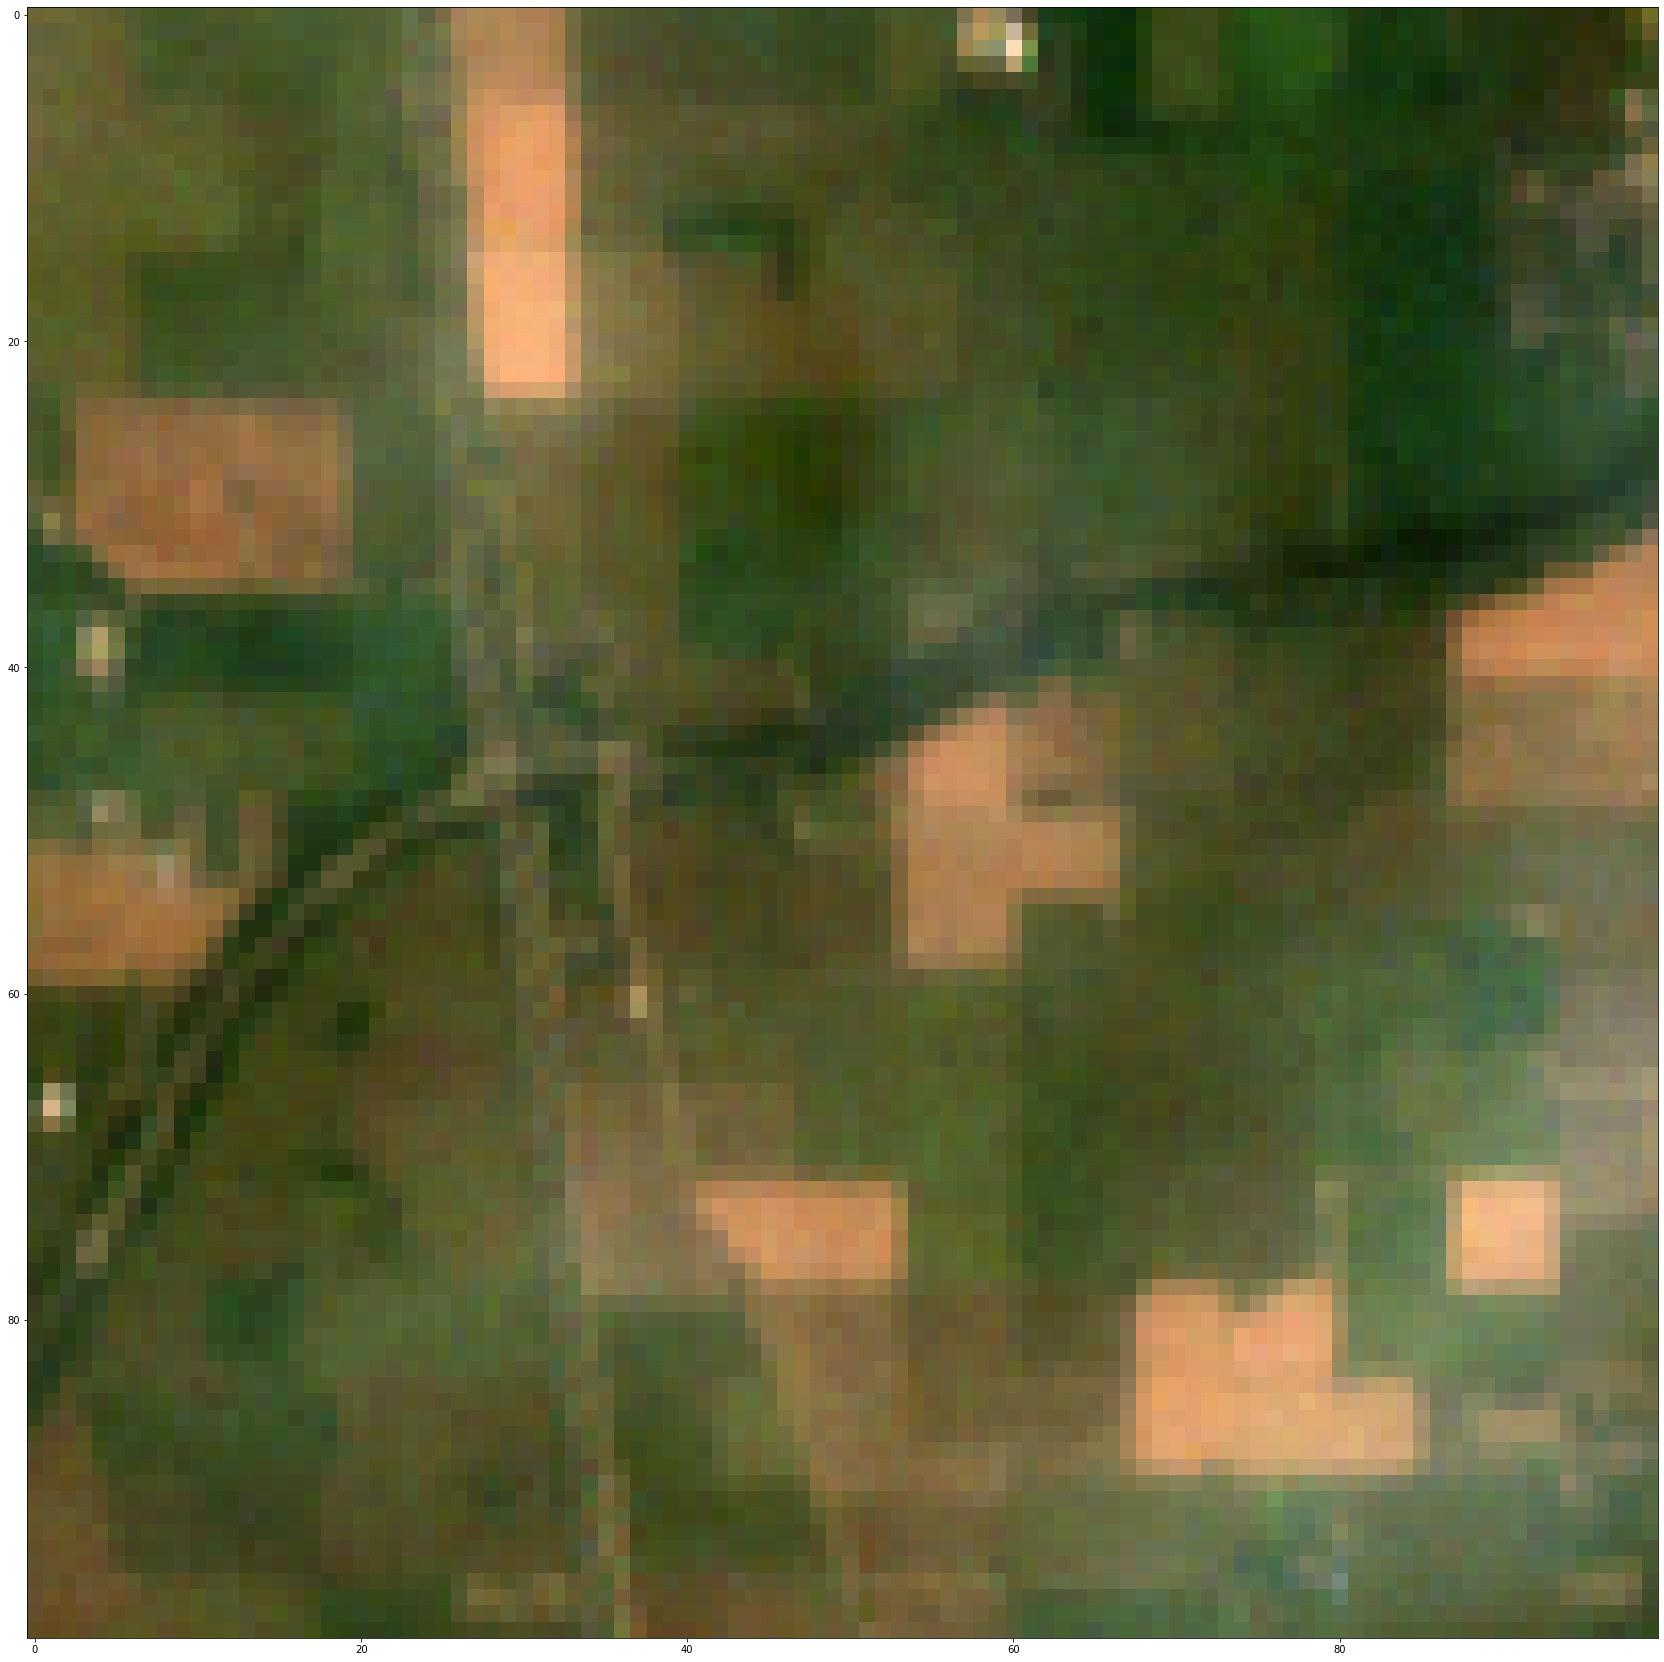

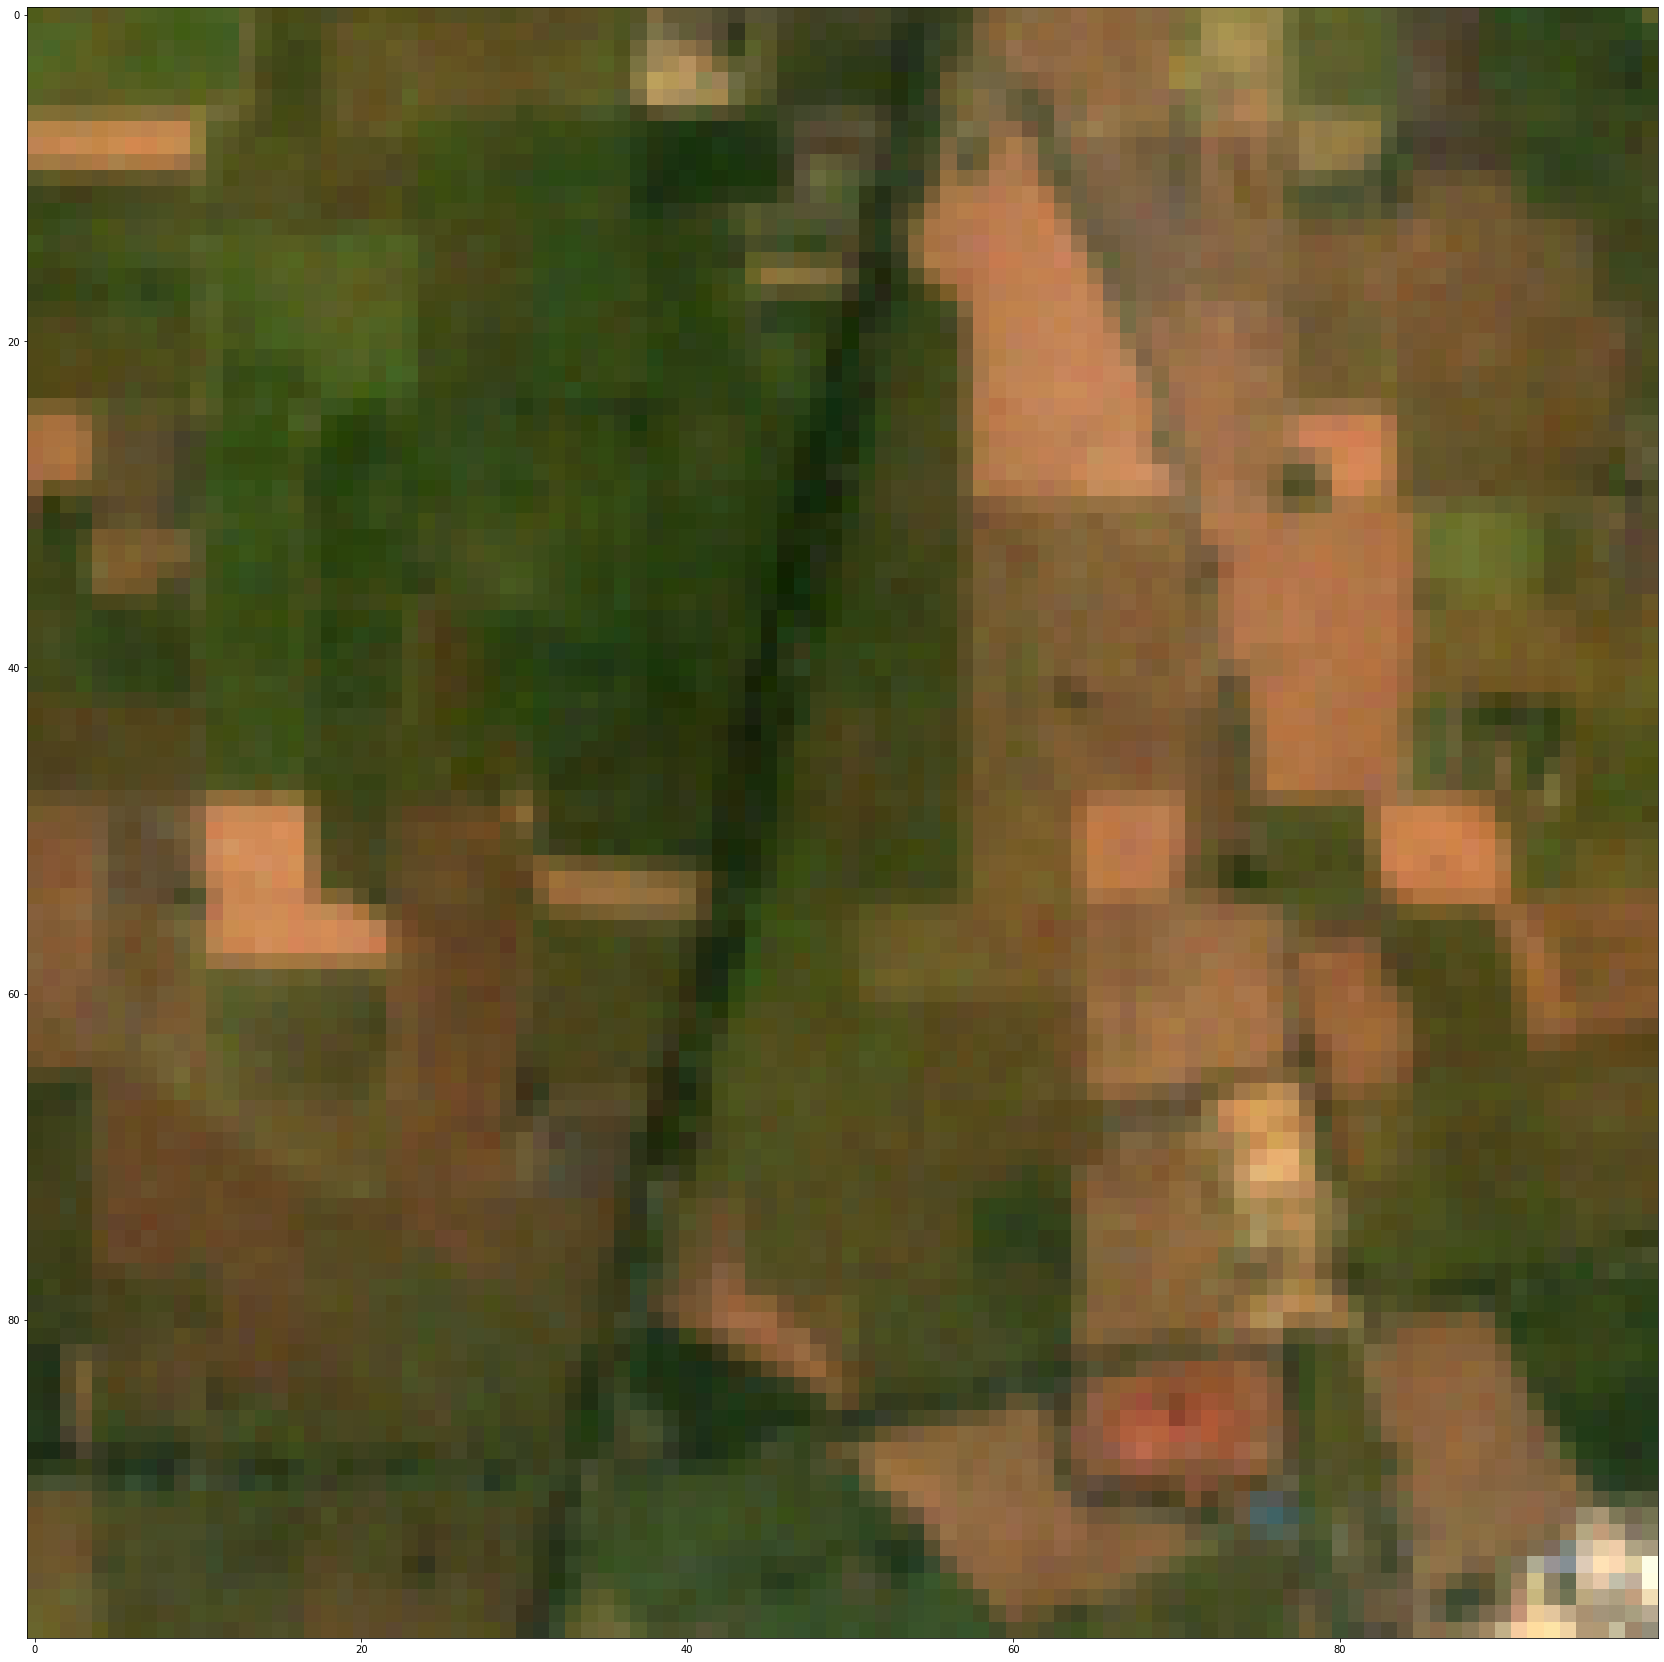

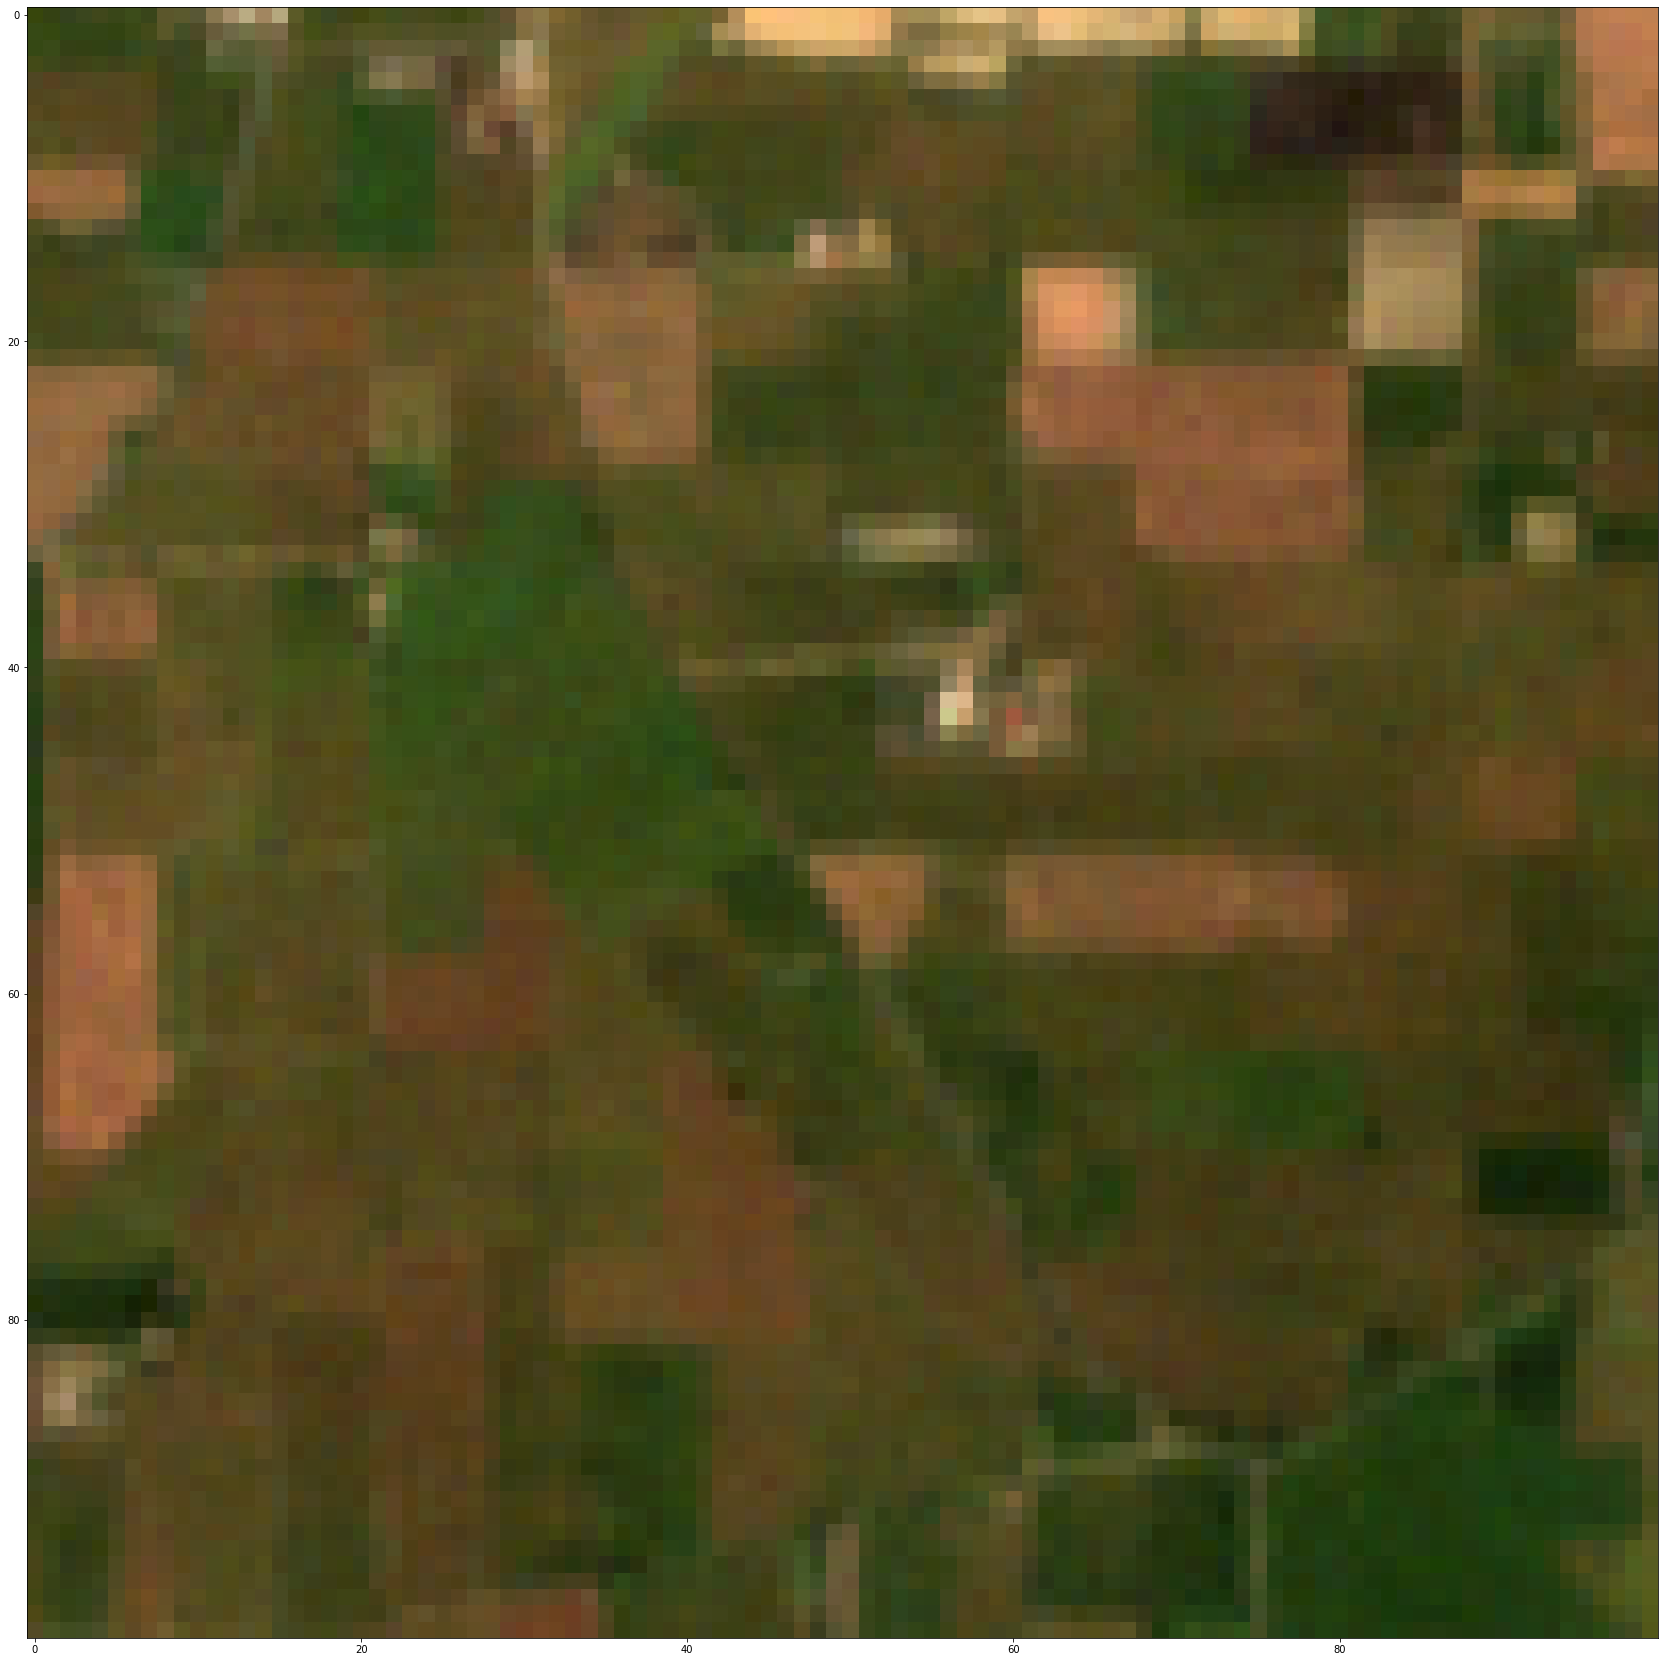

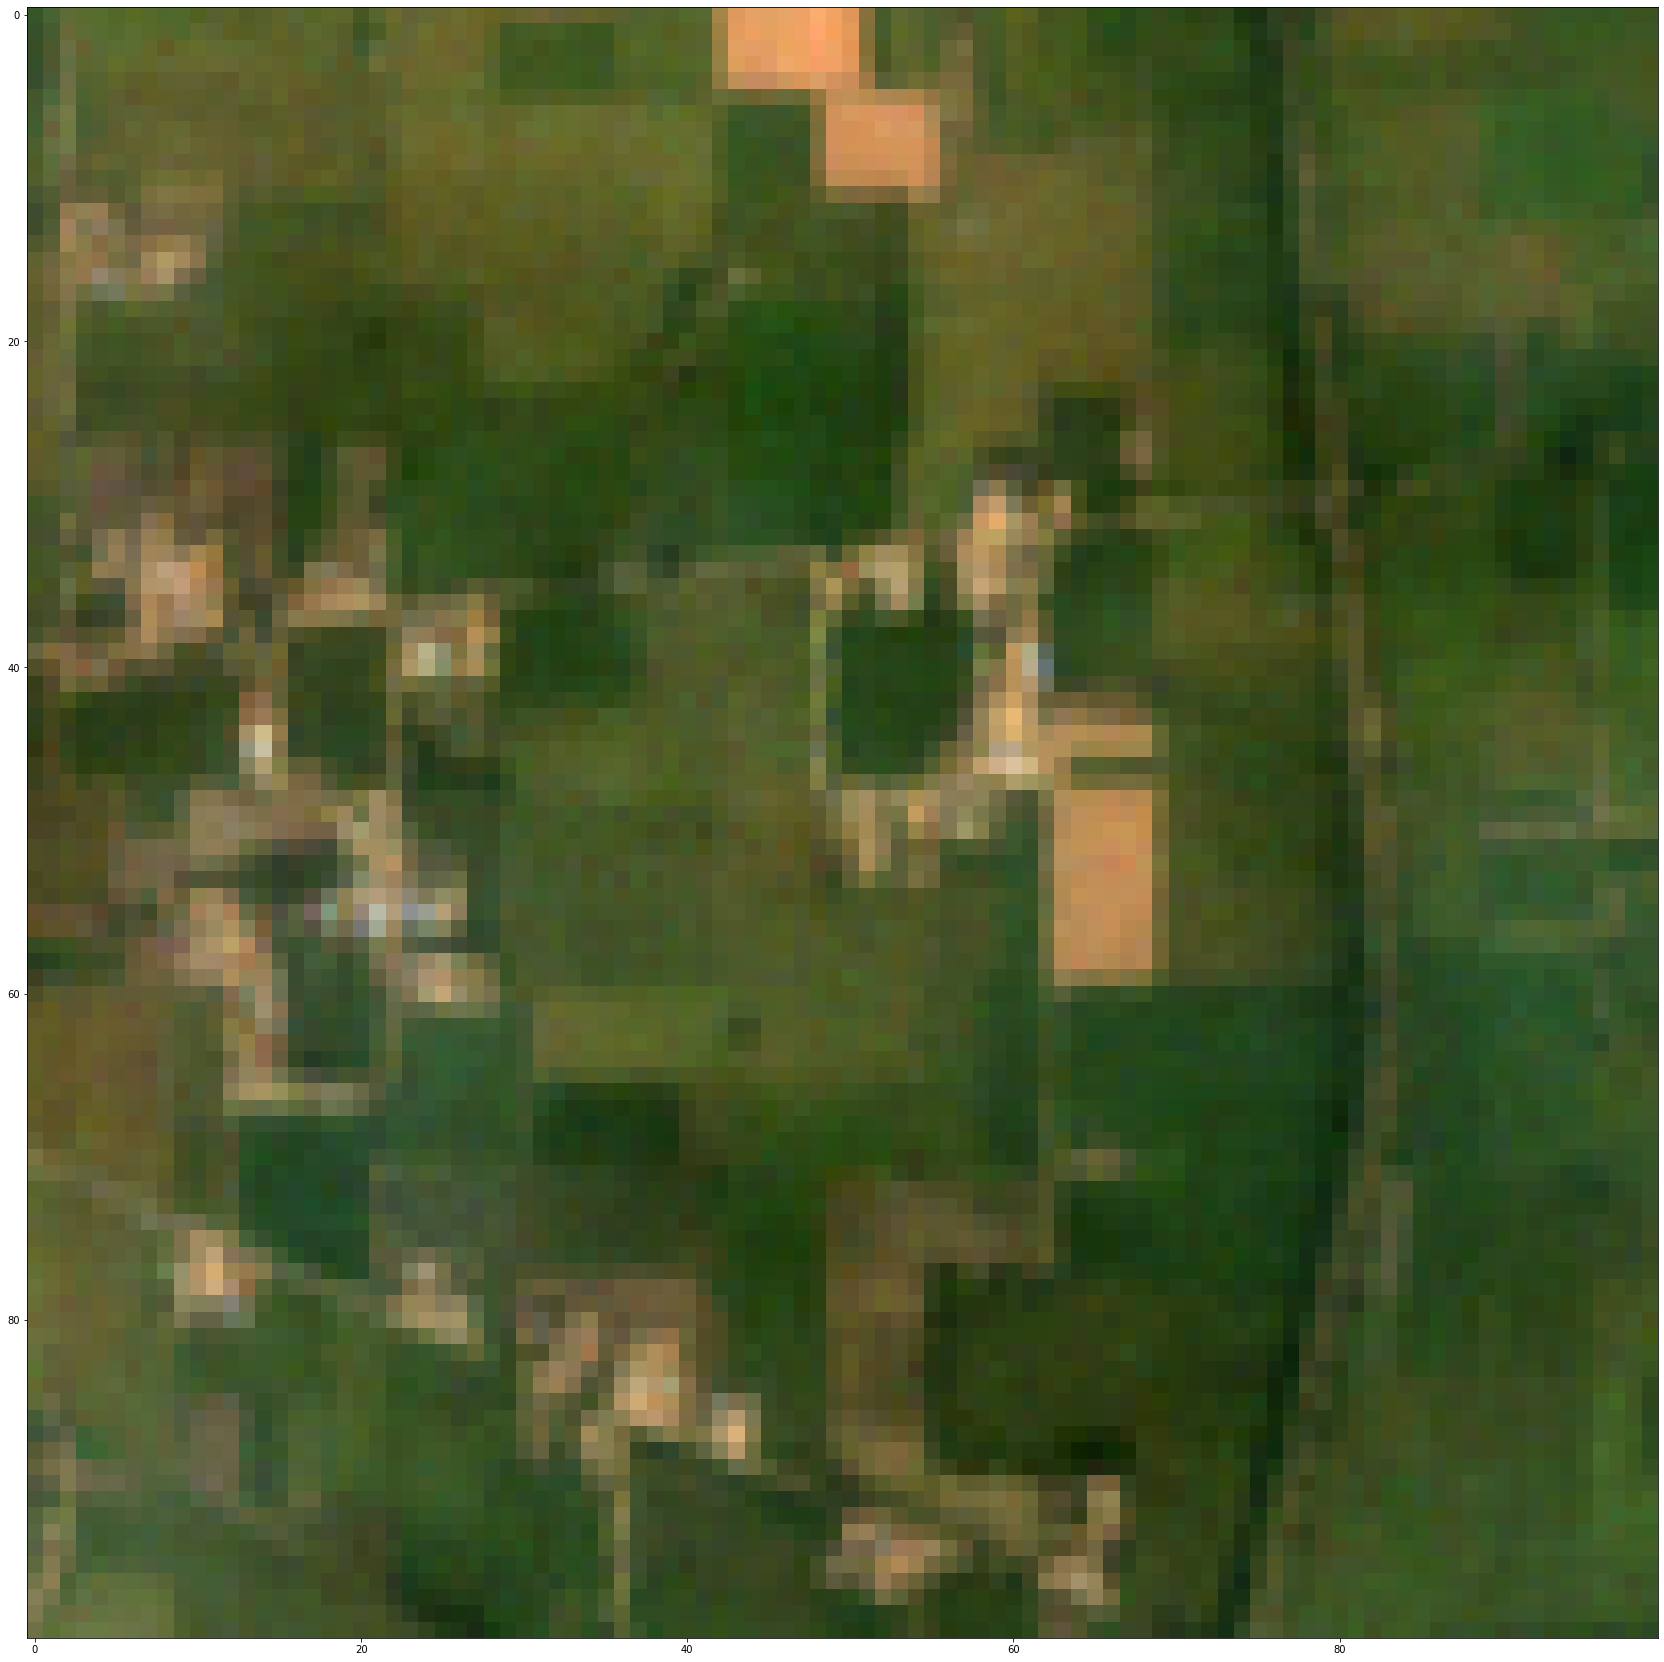

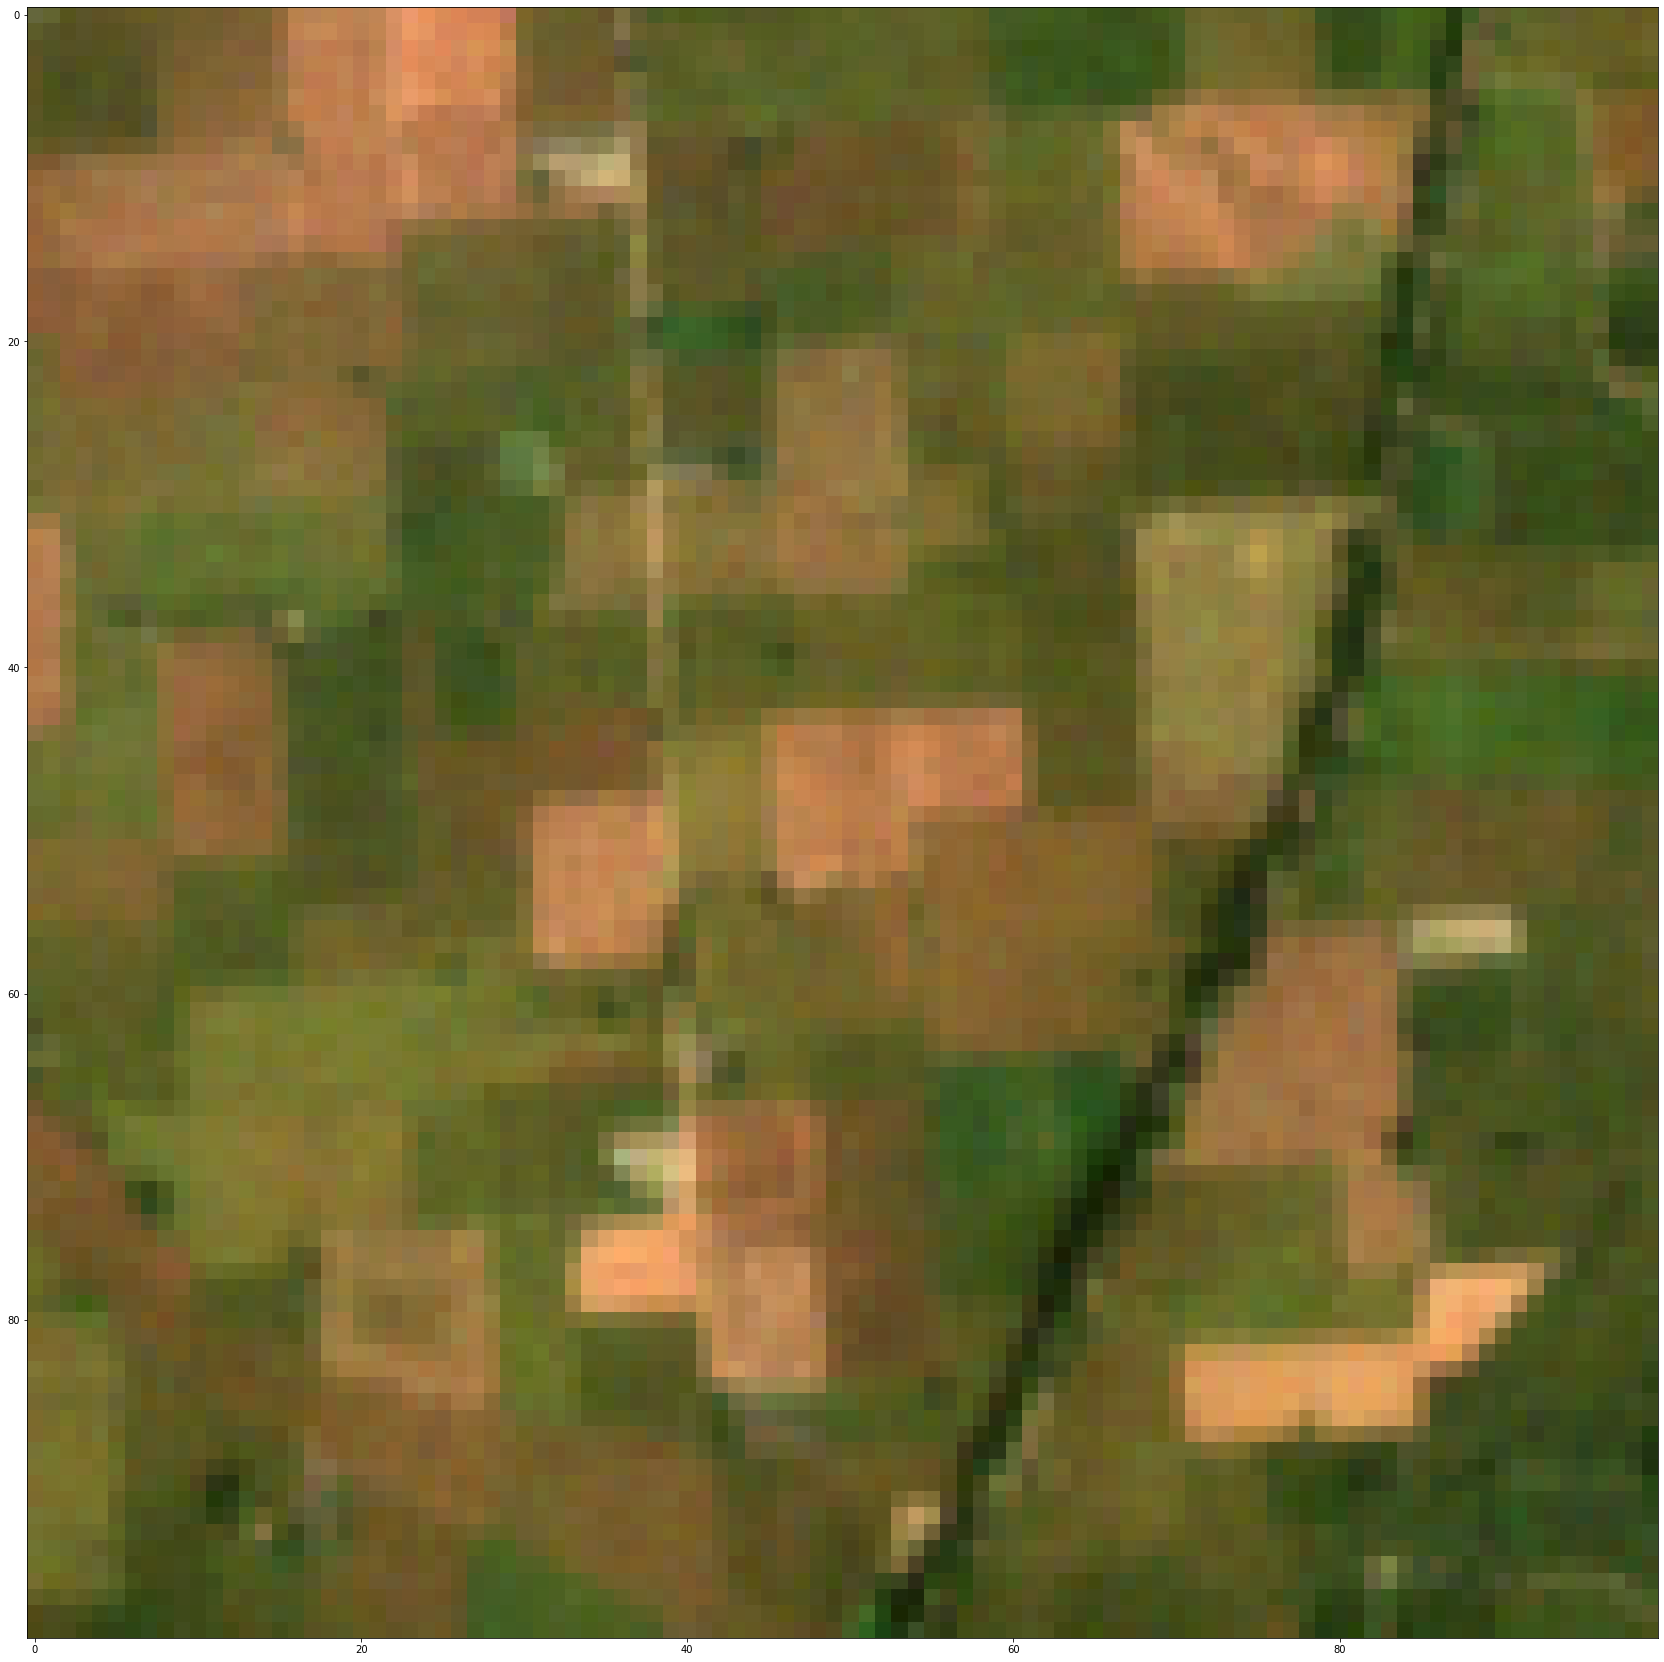

In [1]:
import geopandas as gpd
import rasterio
from rasterio.windows import Window
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
def normalize(img, target_type_min, target_type_max, target_type):
        imin = img.min()
        imax = img.max()
        a = (target_type_max - target_type_min) / (imax - imin)
        b = target_type_max - a * imax
        new_img = (a * img + b).astype(target_type)
        return new_img

shapefile_path = "/home/sambal/Desktop/Plaksha-CDA/stubble_burning/data/modis/DL_FIRE_M-C61_360733/fire_archive_M-C61_360733.shp"
points = gpd.read_file(shapefile_path)
points=points[points['ACQ_DATE']=='2022-10-19']

satellite_image_path = "/home/sambal/Desktop/Plaksha-CDA/stubble_burning/data/satellite_data/sentinel_data/sangrur/images/T43REP_20221019T053829_TCI_10m.tif"
with rasterio.open(satellite_image_path) as src:
    image_extent = src.bounds

# Ensure both datasets have the same CRS
points = points.to_crs(src.crs)

# Determine the intersecting points based on the extent
intersecting_points = points.cx[image_extent[0]:image_extent[2], image_extent[1]:image_extent[3]]


with rasterio.open(satellite_image_path) as src:
    # Ensure both datasets have the same CRS
    points = points.to_crs(src.crs)
    
    # Iterate over the points and extract 256x256 chips centered around each point
    for point in intersecting_points.geometry[:10]:
        # Convert the point coordinates to pixel coordinates
        pixel_coords = src.index(point.x, point.y)
        center_row, center_col = pixel_coords[0], pixel_coords[1]
        
        # Define the window size (256x256) and calculate the window boundaries
        window_size = 100
        half_window = window_size // 2
        window = Window(center_col - half_window, center_row - half_window, window_size, window_size)
        
        # Read the chip from the satellite image using the defined window
        chip = src.read(window=window).transpose(1, 2, 0)[:,:,:]
        chip=normalize(chip,0,255, np.uint8)
        # Plot the chip using matplotlib
        plt.figure(figsize=(30,30))
        plt.imshow(chip)

        plt.show()

In [5]:
intersecting_points[intersecting_points['CONFIDENCE']>75]

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,TYPE,geometry
704,29.7474,76.0329,325.1,1.0,1.0,2022-10-19,0818,Aqua,MODIS,77,6.03,302.9,16.1,D,0,POINT (599874.908 3291242.476)
713,29.8056,75.8578,328.4,1.0,1.0,2022-10-19,0818,Aqua,MODIS,80,6.03,303.1,19.8,D,0,POINT (582895.177 3297553.030)
776,30.7311,75.1943,323.4,1.0,1.0,2022-10-19,0818,Aqua,MODIS,76,6.03,300.4,15.4,D,0,POINT (518600.918 3399817.797)


In [6]:
intersecting_points.shape

(21, 16)